In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
from collections import Counter
import seaborn as sbn


In [125]:
# Reading the Dataset

data_file = open('../data/Wiki-Vote.txt', 'r')
lines = data_file.readlines()

In [126]:
#placing the pointer at the start of edge list in the list of lines read from dataset text file
start_ptr = 0
for i in range(len(lines)):
    if(lines[i][0] == '#'):
        start_ptr += 1

In [127]:
#forming the set of NodeID present in the graph
node_set = set()
for i in range(start_ptr, len(lines)):
    split1 = lines[i].split('\t')
    node1 = int(split1[0])
    node2 = int(split1[1][:(len(split1[1]) - 1)])
    node_set.add(node1)
    node_set.add(node2)

In [128]:
num_nodes = len(node_set) #number of nodes

In [129]:
#NodeIDs are not continuous so we assign a unique integer number to each node. The numbers are continuous and in range [0, (number_of_nodes - 1)]
node_num = 0
node_id_to_num = {} #nodeID to node_number mapping [each nodeID is assigned a unique node_number, node_number range from 0 to (number_of_nodes - 1)]
node_num_to_id = {} #node_number to nodeID mapping
for node_id in node_set:
    node_id_to_num[node_id] = node_num
    node_num_to_id[node_num] = node_id
    node_num += 1

In [130]:
#forming edge list, will use this to create graph using networkx
edge_list = [] #list of edges
for i in range(start_ptr, len(lines)): #reading the edges from txt file lines
    split1 = lines[i].split('\t')
    node1_id = int(split1[0]) #nodeID_1 (From NodeID)
    node2_id = int(split1[1][:(len(split1[1]) - 1)]) #nodeID_2 (To NodeID)
    node1_num = node_id_to_num[node1_id] #get node_num for the nodeID
    node2_num = node_id_to_num[node2_id] #get node_num for the nodeID
    edge_list.append([node1_num, node2_num]) #adding edge to edgelist

Forming Graph

In [131]:
G = nx.DiGraph() #making a directed graph from edge list
G.add_nodes_from(node_id_to_num.values()) #adding nodes to graph
G.add_edges_from(edge_list) #adding edges to graph

Pagerank Scores

In [132]:
pagerank_scores = nx.pagerank(G) #computing pagerank scores 

In [133]:
#uncomment to print 
# print(f"PageRank Scores :\n{pagerank_scores}")

Hubs and Authorities Scores

In [134]:
#HITS algorithm
hits_results = nx.hits(G)
hubs = hits_results[0] #hubs_scores
authorities = hits_results[1] #authorities score

In [135]:
#uncomment to print 
# print(f"Hubs Scores :\n{hubs_scores}")

In [136]:
#uncomment to print 
# print(f"Authorities Scores :\n{hubs_scores}")

Analyzing top pagerank score, authorities score and hubs score nodes

In [137]:
tops_pagerank_by_node_num = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
tops_hubs_by_node_num = sorted(hubs.items(), key=lambda x: x[1], reverse=True)
tops_auth_by_node_num = sorted(authorities.items(), key=lambda x: x[1], reverse=True)

tops_pagerank_node_ids = [(node_num_to_id[x[0]], x[1]) for x in tops_pagerank_by_node_num]
tops_hubs_node_ids = [(node_num_to_id[x[0]], x[1]) for x in tops_hubs_by_node_num]
tops_auth_node_ids = [(node_num_to_id[x[0]], x[1]) for x in tops_auth_by_node_num]

In [138]:
print("Top 10 NodeIDs based on PageRank score")
tops_pagerank_node_ids[:10] #top 10 nodeIDs by pagerank scores

Top 10 NodeIDs based on PageRank score


[(4037, 0.004612715891167541),
 (15, 0.00368122072952927),
 (6634, 0.003524813657640256),
 (2625, 0.003286374369230901),
 (2398, 0.0026053331717250175),
 (2470, 0.002530105328384948),
 (2237, 0.0025047038004839886),
 (4191, 0.0022662633042363433),
 (7553, 0.0021701850491959575),
 (5254, 0.0021500675059293213)]

In [139]:
print("Top 10 NodeIDs based on Authority score")
tops_auth_node_ids[:10] #top 10 nodeIDs by authority scores

Top 10 NodeIDs based on Authority score


[(2398, 0.002580147178008873),
 (4037, 0.0025732411242297922),
 (3352, 0.002328415091497681),
 (1549, 0.002303731480457178),
 (762, 0.0022558748562871386),
 (3089, 0.0022534066884511636),
 (1297, 0.0022501446366627194),
 (2565, 0.0022235641039536113),
 (15, 0.00220154349256558),
 (2625, 0.0021978968034030706)]

In [140]:
print("Top 10 NodeIDs based on Hub score")
tops_hubs_node_ids[:10] #top 10 nodeIDs by hub scores

Top 10 NodeIDs based on Hub score


[(2565, 0.007940492708143142),
 (766, 0.007574335297501249),
 (2688, 0.0064402489910298615),
 (457, 0.006416870490261073),
 (1166, 0.006010567902411201),
 (1549, 0.0057207540582692425),
 (11, 0.0049211820638081025),
 (1151, 0.0045720407017564085),
 (1374, 0.00446788879271111),
 (1133, 0.003918881732057349)]

Distribution plots

In [141]:
def plot_distribution(distribution, xlabel, ylabel, title, save=False):
    '''
        Function to plot distributions
    '''
    distribution_sorted = sorted(distribution.items(), key= lambda x:x[0])
    # print(max(distribution_sorted, key=lambda x : x[1]))
    plt_x = [x[0] for x in distribution_sorted]
    plt_y = [y[1] for y in distribution_sorted]
    plt.plot(plt_x, plt_y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if(save == True):
        plt.savefig(f"{title}.png", bbox_inches='tight', facecolor='w')
    plt.show()

In [142]:
def plot_rugplot(scores_values, xlabel, title, save=False):
    '''
        Function to plot rugplot
    '''

    sbn.rugplot(scores_values)
    plt.xlabel(xlabel)
    plt.title(title)
    if(save==True):
        plt.savefig(f"{title}.png", bbox_inches='tight', facecolor='w')
    plt.show()


In [143]:
pagerank_distribution = dict(Counter(list(pagerank_scores.values())))
hubs_distribution = dict(Counter(list(hubs.values())))
auth_distribution = dict(Counter(list(authorities.values())))

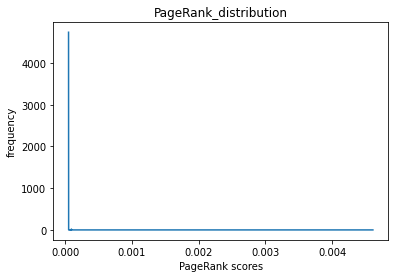

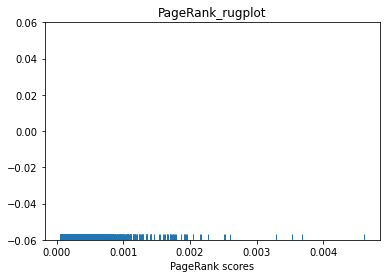

In [144]:
plot_distribution(pagerank_distribution, 'PageRank scores', 'frequency', 'PageRank_distribution', save=True)
plot_rugplot(pagerank_scores.values(), 'PageRank scores', 'PageRank_rugplot', save=True)

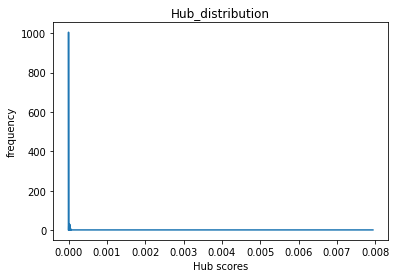

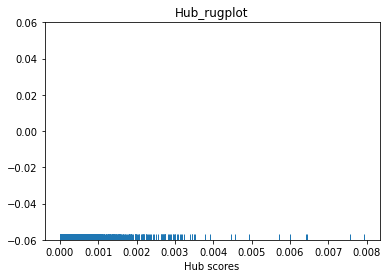

In [145]:
plot_distribution(hubs_distribution, 'Hub scores', 'frequency', 'Hub_distribution', save=True)
plot_rugplot(hubs.values(), 'Hub scores', 'Hub_rugplot', save=True)

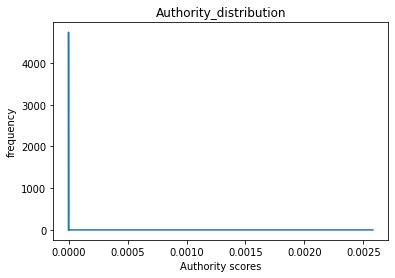

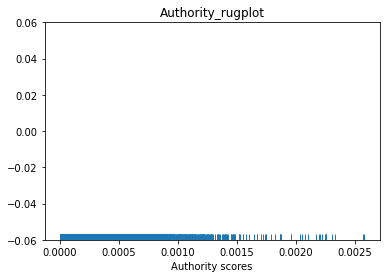

In [146]:
plot_distribution(auth_distribution, 'Authority scores', 'frequency', 'Authority_distribution', save=True)
plot_rugplot(authorities.values(), 'Authority scores', 'Authority_rugplot', save=True)